# Dimensionality reduction

In [1]:
#importing libraries
from random import randint
import time
from time import sleep
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import numpy as np
import pandas as pd

In [2]:
#Sklearn
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import euclidean
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from kneed import KneeLocator
import matplotlib.pyplot as plt
import seaborn as sns
import colorcet as cc
import time
import pickle

### Read .csv and cleand

In [3]:
read_hs = pd.read_csv('hot_songs_features.csv')
read_nhs = pd.read_csv('not_hot_songs_features.csv')

In [4]:
read_hs1 = read_hs.copy()
read_nhs1 = read_nhs.copy()

In [5]:
drop_hs = read_hs1.drop([99])

In [6]:
drop_hs.tail()

,Title,Artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
94,East Side Of Sorrow,Zach Bryan,0.475,0.789,1.0,-6.124,1.0,0.0380,0.17000,0.00000,0.147,0.485,155.227,audio_features,6BOP0cv1eeXcvi1oE8bDVZ,spotify:track:6BOP0cv1eeXcvi1oE8bDVZ,https://api.spotify.com/v1/tracks/6BOP0cv1eeXc...,https://api.spotify.com/v1/audio-analysis/6BOP...,226091.0,4.0
95,Standing Room Only,Tim McGraw,0.731,0.622,5.0,-8.237,1.0,0.0979,0.17600,0.00000,0.153,0.445,82.494,audio_features,6VdBDm20nkyk6A29P785aJ,spotify:track:6VdBDm20nkyk6A29P785aJ,https://api.spotify.com/v1/tracks/6VdBDm20nkyk...,https://api.spotify.com/v1/audio-analysis/6VdB...,198034.0,4.0
96,Checkmate,Rod Wave,0.663,0.502,5.0,-7.070,1.0,0.0285,0.79100,0.00000,0.105,0.371,143.969,audio_features,3jfywRZH6cB2iLyKqo4EZd,spotify:track:3jfywRZH6cB2iLyKqo4EZd,https://api.spotify.com/v1/tracks/3jfywRZH6cB2...,https://api.spotify.com/v1/audio-analysis/3jfy...,183087.0,4.0
97,Can't Have Mine,Dylan Scott,0.481,0.539,4.0,-7.865,0.0,0.1080,0.55100,0.00539,0.120,0.621,153.277,audio_features,1o8Z7GD1CeOaVBEyuzu4HO,spotify:track:1o8Z7GD1CeOaVBEyuzu4HO,https://api.spotify.com/v1/tracks/1o8Z7GD1CeOa...,https://api.spotify.com/v1/audio-analysis/1o8Z...,186678.0,4.0
98,On My Mama,Victoria Monet,0.534,0.820,9.0,-3.440,1.0,0.0886,0.00376,0.00000,0.136,0.664,160.064,audio_features,1haoEnXbsUS3OFIWaUJ3wb,spotify:track:1haoEnXbsUS3OFIWaUJ3wb,https://api.spotify.com/v1/tracks/1haoEnXbsUS3...,https://api.spotify.com/v1/audio-analysis/1hao...,154517.0,4.0


In [7]:
drop_nhs = read_nhs1.drop([2294,2295,2296,2297])

In [8]:
drop_nhs.tail()

,Title,Artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
2289,La Bachata,Manuel Turizo,0.775,0.736,1.0,-8.072,0.0,0.2470,0.31900,0.001160,0.1270,0.362,100.988,audio_features,2g6tReTlM2Akp41g0HaeXN,spotify:track:2g6tReTlM2Akp41g0HaeXN,https://api.spotify.com/v1/tracks/2g6tReTlM2Ak...,https://api.spotify.com/v1/audio-analysis/2g6t...,239027.0,4.0
2290,Until I Found You,Stephen Sanchez,0.935,0.807,11.0,-3.838,0.0,0.1140,0.05140,0.000000,0.3490,0.813,106.017,audio_features,6Zu3aw7FfjAF9WA0fA81Oq,spotify:track:6Zu3aw7FfjAF9WA0fA81Oq,https://api.spotify.com/v1/tracks/6Zu3aw7FfjAF...,https://api.spotify.com/v1/audio-analysis/6Zu3...,173182.0,4.0
2291,Made You Look,Meghan Trainor,0.751,0.468,5.0,-9.251,1.0,0.3130,0.15000,0.000015,0.1920,0.214,150.009,audio_features,1DlLCrqbalAshwtMexNkGR,spotify:track:1DlLCrqbalAshwtMexNkGR,https://api.spotify.com/v1/tracks/1DlLCrqbalAs...,https://api.spotify.com/v1/audio-analysis/1DlL...,184842.0,4.0
2292,Midnight Rain,Taylor Swift,0.773,0.422,1.0,-4.572,0.0,0.1870,0.00783,0.006930,0.1290,0.488,77.502,audio_features,3XOalgusokruzA5ZBA2Qcb,spotify:track:3XOalgusokruzA5ZBA2Qcb,https://api.spotify.com/v1/tracks/3XOalgusokru...,https://api.spotify.com/v1/audio-analysis/3XOa...,136267.0,1.0
2293,Die Hard,Kendrick Lamar,0.376,0.657,7.0,-4.658,1.0,0.0768,0.08580,0.000000,0.0884,0.203,80.565,audio_features,1r8ZCjfrQxoy2wVaBUbpwg,spotify:track:1r8ZCjfrQxoy2wVaBUbpwg,https://api.spotify.com/v1/tracks/1r8ZCjfrQxoy...,https://api.spotify.com/v1/audio-analysis/1r8Z...,164782.0,4.0


In [9]:
#Save the final dataframes
drop_hs.to_csv("hot_songs_features_final.csv", index=False)
drop_nhs.to_csv("not_hot_songs_features_final.csv", index=False)

### Hot or not_hot songs (Y/N)

In [10]:
#Read df

hot_songs_features = pd.read_csv('hot_songs_features_final.csv')
not_hot_songs_features = pd.read_csv('not_hot_songs_features_final.csv')

In [11]:
# hot_song_features["Hot"] = "Y"
# not_hot_songs["Hot"] = "N"

In [12]:
hot_songs_features["Hot"] = "Y"
hot_songs_features

,Title,Artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,Hot
0,Paint The Town Red,Doja Cat,0.864,0.556,2.0,-7.683,0.0,0.1940,0.25500,0.000004,...,0.726,99.974,audio_features,56y1jOTK0XSvJzVv9vHQBK,spotify:track:56y1jOTK0XSvJzVv9vHQBK,https://api.spotify.com/v1/tracks/56y1jOTK0XSv...,https://api.spotify.com/v1/audio-analysis/56y1...,230480.0,4.0,Y
1,Snooze,SZA,0.559,0.551,5.0,-7.231,1.0,0.1320,0.14100,0.000000,...,0.392,143.008,audio_features,4iZ4pt7kvcaH6Yo8UoZ4s2,spotify:track:4iZ4pt7kvcaH6Yo8UoZ4s2,https://api.spotify.com/v1/tracks/4iZ4pt7kvcaH...,https://api.spotify.com/v1/audio-analysis/4iZ4...,201800.0,4.0,Y
2,Fast Car,Luke Combs,0.551,0.801,6.0,-5.069,1.0,0.0303,0.01300,0.000006,...,0.625,128.027,audio_features,1mMLMZYXkMueg65jRRWG1l,spotify:track:1mMLMZYXkMueg65jRRWG1l,https://api.spotify.com/v1/tracks/1mMLMZYXkMue...,https://api.spotify.com/v1/audio-analysis/1mML...,240760.0,4.0,Y
3,Cruel Summer,Taylor Swift,0.666,0.871,1.0,-6.017,0.0,0.0272,0.27000,0.020800,...,0.936,108.501,audio_features,2EGaDf0cPX789H3LNeB03D,spotify:track:2EGaDf0cPX789H3LNeB03D,https://api.spotify.com/v1/tracks/2EGaDf0cPX78...,https://api.spotify.com/v1/audio-analysis/2EGa...,215326.0,4.0,Y
4,I Remember Everything,Zach Bryan Featuring Kacey Musgraves,0.429,0.453,0.0,-7.746,1.0,0.0459,0.55400,0.000002,...,0.155,77.639,audio_features,4KULAymBBJcPRpk1yO4dOG,spotify:track:4KULAymBBJcPRpk1yO4dOG,https://api.spotify.com/v1/tracks/4KULAymBBJcP...,https://api.spotify.com/v1/audio-analysis/4KUL...,227196.0,4.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,East Side Of Sorrow,Zach Bryan,0.475,0.789,1.0,-6.124,1.0,0.0380,0.17000,0.000000,...,0.485,155.227,audio_features,6BOP0cv1eeXcvi1oE8bDVZ,spotify:track:6BOP0cv1eeXcvi1oE8bDVZ,https://api.spotify.com/v1/tracks/6BOP0cv1eeXc...,https://api.spotify.com/v1/audio-analysis/6BOP...,226091.0,4.0,Y
95,Standing Room Only,Tim McGraw,0.731,0.622,5.0,-8.237,1.0,0.0979,0.17600,0.000000,...,0.445,82.494,audio_features,6VdBDm20nkyk6A29P785aJ,spotify:track:6VdBDm20nkyk6A29P785aJ,https://api.spotify.com/v1/tracks/6VdBDm20nkyk...,https://api.spotify.com/v1/audio-analysis/6VdB...,198034.0,4.0,Y
96,Checkmate,Rod Wave,0.663,0.502,5.0,-7.070,1.0,0.0285,0.79100,0.000000,...,0.371,143.969,audio_features,3jfywRZH6cB2iLyKqo4EZd,spotify:track:3jfywRZH6cB2iLyKqo4EZd,https://api.spotify.com/v1/tracks/3jfywRZH6cB2...,https://api.spotify.com/v1/audio-analysis/3jfy...,183087.0,4.0,Y
97,Can't Have Mine,Dylan Scott,0.481,0.539,4.0,-7.865,0.0,0.1080,0.55100,0.005390,...,0.621,153.277,audio_features,1o8Z7GD1CeOaVBEyuzu4HO,spotify:track:1o8Z7GD1CeOaVBEyuzu4HO,https://api.spotify.com/v1/tracks/1o8Z7GD1CeOa...,https://api.spotify.com/v1/audio-analysis/1o8Z...,186678.0,4.0,Y


In [13]:
not_hot_songs_features["Hot"] = "N"
not_hot_songs_features

,Title,Artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,Hot
0,Yellow,Coldplay,0.429,0.661,11.0,-7.227,1.0,0.0281,0.00239,0.000121,...,0.285,173.372,audio_features,3AJwUDP919kvQ9QcozQPxg,spotify:track:3AJwUDP919kvQ9QcozQPxg,https://api.spotify.com/v1/tracks/3AJwUDP919kv...,https://api.spotify.com/v1/audio-analysis/3AJw...,266773.0,4.0,N
1,All The Small Things,blink-182,0.434,0.897,0.0,-4.918,1.0,0.0488,0.01030,0.000000,...,0.684,148.726,audio_features,2m1hi0nfMR9vdGC8UcrnwU,spotify:track:2m1hi0nfMR9vdGC8UcrnwU,https://api.spotify.com/v1/tracks/2m1hi0nfMR9v...,https://api.spotify.com/v1/audio-analysis/2m1h...,167067.0,4.0,N
2,Breathe,Faith Hill,0.529,0.496,7.0,-9.007,1.0,0.0290,0.17300,0.000000,...,0.278,136.859,audio_features,3y4LxiYMgDl4RethdzpmNe,spotify:track:3y4LxiYMgDl4RethdzpmNe,https://api.spotify.com/v1/tracks/3y4LxiYMgDl4...,https://api.spotify.com/v1/audio-analysis/3y4L...,250547.0,4.0,N
3,In the End,Linkin Park,0.556,0.864,3.0,-5.870,0.0,0.0584,0.00958,0.000000,...,0.400,105.143,audio_features,60a0Rd6pjrkxjPbaKzXjfq,spotify:track:60a0Rd6pjrkxjPbaKzXjfq,https://api.spotify.com/v1/tracks/60a0Rd6pjrkx...,https://api.spotify.com/v1/audio-analysis/60a0...,216880.0,4.0,N
4,Bye Bye Bye,*NSYNC,0.610,0.926,8.0,-4.843,0.0,0.0479,0.03100,0.001200,...,0.861,172.638,audio_features,62bOmKYxYg7dhrC6gH9vFn,spotify:track:62bOmKYxYg7dhrC6gH9vFn,https://api.spotify.com/v1/tracks/62bOmKYxYg7d...,https://api.spotify.com/v1/audio-analysis/62bO...,200400.0,4.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2289,La Bachata,Manuel Turizo,0.775,0.736,1.0,-8.072,0.0,0.2470,0.31900,0.001160,...,0.362,100.988,audio_features,2g6tReTlM2Akp41g0HaeXN,spotify:track:2g6tReTlM2Akp41g0HaeXN,https://api.spotify.com/v1/tracks/2g6tReTlM2Ak...,https://api.spotify.com/v1/audio-analysis/2g6t...,239027.0,4.0,N
2290,Until I Found You,Stephen Sanchez,0.935,0.807,11.0,-3.838,0.0,0.1140,0.05140,0.000000,...,0.813,106.017,audio_features,6Zu3aw7FfjAF9WA0fA81Oq,spotify:track:6Zu3aw7FfjAF9WA0fA81Oq,https://api.spotify.com/v1/tracks/6Zu3aw7FfjAF...,https://api.spotify.com/v1/audio-analysis/6Zu3...,173182.0,4.0,N
2291,Made You Look,Meghan Trainor,0.751,0.468,5.0,-9.251,1.0,0.3130,0.15000,0.000015,...,0.214,150.009,audio_features,1DlLCrqbalAshwtMexNkGR,spotify:track:1DlLCrqbalAshwtMexNkGR,https://api.spotify.com/v1/tracks/1DlLCrqbalAs...,https://api.spotify.com/v1/audio-analysis/1DlL...,184842.0,4.0,N
2292,Midnight Rain,Taylor Swift,0.773,0.422,1.0,-4.572,0.0,0.1870,0.00783,0.006930,...,0.488,77.502,audio_features,3XOalgusokruzA5ZBA2Qcb,spotify:track:3XOalgusokruzA5ZBA2Qcb,https://api.spotify.com/v1/tracks/3XOalgusokru...,https://api.spotify.com/v1/audio-analysis/3XOa...,136267.0,1.0,N


_____

## Concat DataFrame 


In [14]:
concat_nhs_hs = pd.concat([hot_songs_features, not_hot_songs_features], axis=0) 
concat_nhs_hs.head(1)

,Title,Artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,Hot
0,Paint The Town Red,Doja Cat,0.864,0.556,2.0,-7.683,0.0,0.194,0.255,0.000004,...,0.726,99.974,audio_features,56y1jOTK0XSvJzVv9vHQBK,spotify:track:56y1jOTK0XSvJzVv9vHQBK,https://api.spotify.com/v1/tracks/56y1jOTK0XSv...,https://api.spotify.com/v1/audio-analysis/56y1...,230480.0,4.0,Y


In [15]:
#Save the final dataframe hot_songs+ids+audio_features
#hot_songs_features.to_csv("hot_songs_features.csv", index=False)

In [16]:
concat_nhs_hs.shape

(2393, 21)

In [17]:
concat_nhs_hs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2393 entries, 0 to 2293
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             2393 non-null   object 
 1   Artist            2393 non-null   object 
 2   danceability      2393 non-null   float64
 3   energy            2393 non-null   float64
 4   key               2393 non-null   float64
 5   loudness          2393 non-null   float64
 6   mode              2393 non-null   float64
 7   speechiness       2393 non-null   float64
 8   acousticness      2393 non-null   float64
 9   instrumentalness  2393 non-null   float64
 10  liveness          2393 non-null   float64
 11  valence           2393 non-null   float64
 12  tempo             2393 non-null   float64
 13  type              2393 non-null   object 
 14  id                2393 non-null   object 
 15  uri               2393 non-null   object 
 16  track_href        2393 non-null   object 


In [18]:
features = concat_nhs_hs.iloc[:, list(range(2, 13)) + list(range(18, 20))].copy()
features.head(50)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.864,0.5560,2.0,-7.683,0.0,0.1940,0.255000,0.000004,0.1120,0.726,99.974,230480.0,4.0
1,0.559,0.5510,5.0,-7.231,1.0,0.1320,0.141000,0.000000,0.1100,0.392,143.008,201800.0,4.0
2,0.551,0.8010,6.0,-5.069,1.0,0.0303,0.013000,0.000006,0.2650,0.625,128.027,240760.0,4.0
3,0.666,0.8710,1.0,-6.017,0.0,0.0272,0.270000,0.020800,0.2630,0.936,108.501,215326.0,4.0
4,0.429,0.4530,0.0,-7.746,1.0,0.0459,0.554000,0.000002,0.1020,0.155,77.639,227196.0,4.0
5,0.517,0.6750,6.0,-5.382,1.0,0.0357,0.459000,0.000000,0.1510,0.518,203.853,163855.0,4.0
6,0.675,0.6090,1.0,-7.905,1.0,0.0940,0.284000,0.268000,0.1120,0.057,119.973,300000.0,4.0
7,0.847,0.6220,1.0,-6.747,0.0,0.0903,0.119000,0.000000,0.2850,0.220,130.001,125040.0,4.0
8,0.801,0.8060,11.0,-5.206,1.0,0.0381,0.382000,0.000669,0.1140,0.802,106.999,239318.0,4.0
9,0.671,0.8450,11.0,-4.930,0.0,0.0480,0.020700,0.000000,0.3290,0.775,110.056,176579.0,4.0


## Scaling features


In [19]:
features.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,2393.000000,2393.000000,2393.000000,2393.000000,2393.000000,2393.000000,2393.000000,2393.000000,2393.000000,2393.000000,2393.000000,2393.000000,2393.000000
mean,0.654972,0.682573,5.246135,-6.050226,0.611366,0.097543,0.175801,0.029112,0.174655,0.530481,121.136483,223321.473046,3.974091
std,0.143712,0.176478,3.594404,2.677144,0.487542,0.092555,0.228216,0.136587,0.135874,0.231151,27.848254,44775.877261,0.252408
min,0.162000,0.009370,0.000000,-34.840000,0.000000,0.022500,0.000013,0.000000,0.021000,0.000010,50.141000,62253.000000,1.000000
25%,0.562000,0.576000,2.000000,-7.054000,0.000000,0.038000,0.018500,0.000000,0.090700,0.354000,99.050000,197547.000000,4.000000
50%,0.665000,0.706000,5.000000,-5.613000,1.000000,0.057300,0.076100,0.000000,0.120000,0.536000,120.040000,220291.000000,4.000000
75%,0.757000,0.816000,8.000000,-4.381000,1.000000,0.113000,0.237000,0.000064,0.222000,0.717000,138.015000,245000.000000,4.000000
max,0.975000,0.988000,11.000000,-0.276000,1.000000,0.591000,0.995000,0.991000,0.971000,0.974000,210.857000,688453.000000,5.000000


In [20]:

scaler = StandardScaler()
scaler.fit(features)
filename = "./songs_scaler.pickle" # Path with filename
with open(filename, "wb") as file:
        pickle.dump(scaler,file)

features_scaled = scaler.transform(features)



features_scaled_df = pd.DataFrame(features_scaled, columns = features.columns)

In [21]:
features_scaled_df.head(3)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1.454791,-0.717367,-0.903297,-0.610021,-1.254240,1.042370,0.347109,-0.213159,-0.461220,0.846027,-0.760080,0.159908,0.102668
1,-0.667945,-0.745705,-0.068491,-0.441149,0.797295,0.372360,-0.152522,-0.213187,-0.475943,-0.599216,0.785546,-0.480749,0.102668
2,-0.723624,0.671201,0.209777,0.366596,0.797295,-0.726673,-0.713511,-0.213143,0.665060,0.408992,0.247483,0.389544,0.102668


In [22]:
features_scaled_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,2.393000e+03,2.393000e+03,2.393000e+03,2.393000e+03,2.393000e+03,2.393000e+03,2.393000e+03,2.393000e+03,2.393000e+03,2.393000e+03,2.393000e+03,2.393000e+03,2.393000e+03
mean,-1.068932e-16,-2.137864e-16,1.336165e-17,-8.907765e-18,5.938510e-17,-1.781553e-16,-8.907765e-17,-9.650079e-18,2.167556e-16,6.176051e-16,2.019093e-16,-3.325566e-16,-6.829287e-17
std,1.000209e+00,1.000209e+00,1.000209e+00,1.000209e+00,1.000209e+00,1.000209e+00,1.000209e+00,1.000209e+00,1.000209e+00,1.000209e+00,1.000209e+00,1.000209e+00,1.000209e+00
min,-3.430983e+00,-3.815459e+00,-1.459833e+00,-1.075616e+01,-1.254240e+00,-8.109643e-01,-7.704302e-01,-2.131873e-01,-1.131100e+00,-2.295386e+00,-2.549902e+00,-3.597967e+00,-1.178534e+01
25%,-6.470658e-01,-6.040142e-01,-9.032965e-01,-3.750203e-01,-1.254240e+00,-6.434618e-01,-6.894063e-01,-2.131873e-01,-6.180162e-01,-7.636448e-01,-7.932669e-01,-5.757533e-01,1.026684e-01
50%,6.979278e-02,1.327766e-01,-6.849146e-02,1.633524e-01,7.972955e-01,-4.348942e-01,-4.369612e-01,-2.131873e-01,-4.023299e-01,2.388261e-02,-3.938171e-02,-6.769508e-02,1.026684e-01
75%,7.100937e-01,7.562150e-01,7.663136e-01,6.236404e-01,7.972955e-01,1.670342e-01,2.682197e-01,-2.127164e-01,3.485237e-01,8.070829e-01,6.062156e-01,4.842576e-01,1.026684e-01
max,2.227328e+00,1.731046e+00,1.601119e+00,2.157311e+00,7.972955e-01,5.332596e+00,3.590327e+00,7.043794e+00,5.862145e+00,1.919141e+00,3.222438e+00,1.039016e+01,4.065339e+00


### PCA

In [23]:
from sklearn.decomposition import PCA

# When we create an instance of PCA, we can specify how many principal components we want to extract.
# However, as we don't know beforehand how much variance it will explain each principal component it's
# allways better to not set the option "n_components" to a given integer number.

pca = PCA()
pca.fit(features_scaled_df)
principal_components = pca.transform(features_scaled_df)
principal_components_df = pd.DataFrame(principal_components, columns=['PCA_'+ str(i) for i in range(1,features_scaled_df.shape[1]+1)])
principal_components_df.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11,PCA_12,PCA_13
0,0.149442,-2.291443,-0.570646,-0.029856,1.079605,0.252891,0.250975,-1.048253,0.150435,-0.264345,0.229729,0.224841,-0.016145
1,0.834009,0.661565,-0.039238,-0.638074,-0.036820,0.920871,-0.677748,0.227240,-0.405213,0.308296,-0.297133,0.426402,-0.239358
2,-0.913617,1.227355,-0.042173,-0.089479,-0.449133,-0.453721,0.149601,0.699256,0.256766,-0.357394,-0.038991,0.485959,-0.052679
3,-1.061876,-0.711208,-0.176099,-0.073551,-0.774499,-0.699600,1.111297,-1.262973,0.339408,-1.131749,1.141240,0.377862,0.433185
4,2.861587,1.141353,-1.999040,0.049371,0.137282,-0.386465,0.421235,-0.409364,-0.848611,0.416150,0.936383,-0.189874,-0.118735


In [24]:
print(pca.explained_variance_ratio_)

[0.20553422 0.11197232 0.08646415 0.08606486 0.0819277  0.07728864
 0.07537957 0.06613583 0.06534895 0.05235072 0.04526144 0.03044826
 0.01582334]


In [25]:
cumulated_explained_variance_ratio = [sum(pca.explained_variance_ratio_[0:i+1]) for i,value in enumerate(pca.explained_variance_ratio_)]
cumulated_explained_variance_ratio

[0.20553421873113698,
 0.31750653642739657,
 0.4039706848478537,
 0.49003554908154473,
 0.5719632485986647,
 0.6492518891781667,
 0.7246314567681479,
 0.7907672889644302,
 0.8561162358910787,
 0.9084669556056593,
 0.9537283996431611,
 0.9841766641749339,
 1.0000000000000002]

This method is not appropriate to reduce the columns because we would need to many and that is not what we want.

### ISOMAP

In [26]:
from sklearn.manifold import Isomap

iso = Isomap(n_neighbors=12, n_components=2)
iso.fit(features_scaled_df)


X_isomap_transformed = iso.transform(features_scaled_df)
X_isomap_transformed_df = pd.DataFrame(X_isomap_transformed, columns=["ISO_1","ISO_2"])
X_isomap_transformed_df.head()

,ISO_1,ISO_2
0,5.605747,0.129472
1,-3.157980,0.540552
2,-3.715833,-0.750687
3,6.493931,-1.895372
4,-2.343562,3.084319


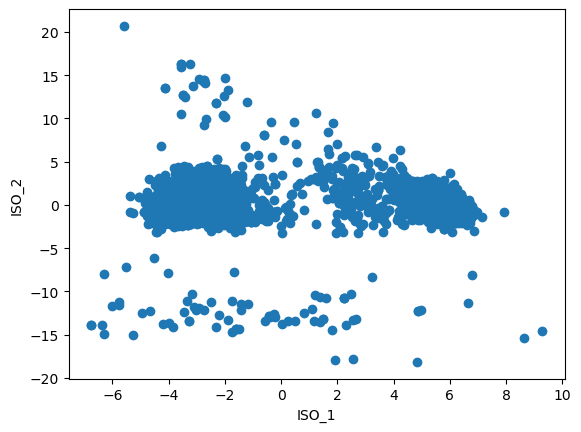

In [27]:
fig, ax = plt.subplots()
ax.scatter(X_isomap_transformed_df['ISO_1'],X_isomap_transformed_df['ISO_2'])
ax.set_xlabel("ISO_1")
ax.set_ylabel("ISO_2")
plt.show()

### TSNE

In [28]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=100, init='random', perplexity=40, random_state=12)

X_tsne_transformed = tsne.fit_transform(features_scaled_df)
# use pickle to save the tnse. tnse.transform(user_song_audio_features_scaled)
filename = "./tsne_features.pickle" # Path with filename
with open(filename, "wb") as file:
        pickle.dump(tsne,file)

X_tsne_transformed_df = pd.DataFrame(X_tsne_transformed, columns=["TSNE_1","TSNE_2"])
X_tsne_transformed_df.head()

,TSNE_1,TSNE_2
0,12.057183,30.787363
1,-10.278848,-15.751392
2,31.176271,-17.586489
3,1.761075,48.901566
4,-25.752190,-14.395313


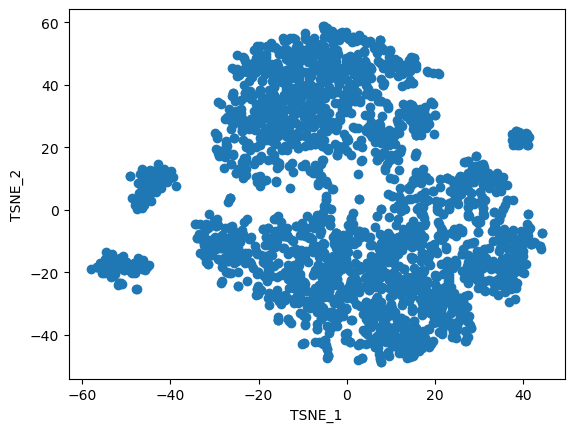

In [29]:
from mpl_toolkits.mplot3d import Axes3D
fig, ax = plt.subplots()
ax.scatter(X_tsne_transformed_df['TSNE_1'],X_tsne_transformed_df['TSNE_2'])
ax.set_xlabel("TSNE_1")
ax.set_ylabel("TSNE_2")
plt.show()

# Clustering

In [30]:
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### K-MEAN

In [31]:
kmeans = KMeans(n_clusters=5, random_state=1234)
kmeans.fit(X_tsne_transformed_df)

filename = "./kmeans_features.pickle" # Path with filename
with open(filename, "wb") as file:
        pickle.dump(kmeans,file)
# save the kmeans with pickle

C:\Users\amraf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [32]:
clusters = kmeans.predict(X_tsne_transformed_df)
#clusters
pd.Series(clusters).value_counts().sort_index() # Number of wines in each cluster

0    441
1    420
2    788
3    441
4    303
dtype: int64

In [33]:
features["cluster"] = clusters
features.head()


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,0.864,0.556,2.0,-7.683,0.0,0.1940,0.255,0.000004,0.112,0.726,99.974,230480.0,4.0,2
1,0.559,0.551,5.0,-7.231,1.0,0.1320,0.141,0.000000,0.110,0.392,143.008,201800.0,4.0,3
2,0.551,0.801,6.0,-5.069,1.0,0.0303,0.013,0.000006,0.265,0.625,128.027,240760.0,4.0,1
3,0.666,0.871,1.0,-6.017,0.0,0.0272,0.270,0.020800,0.263,0.936,108.501,215326.0,4.0,2
4,0.429,0.453,0.0,-7.746,1.0,0.0459,0.554,0.000002,0.102,0.155,77.639,227196.0,4.0,4


In [34]:
# user_scaled = scaler.transform(x_user)
# user_cluster = kmeans.predict(x_user_scaled)
# features[(features['cluster'] == "N") & (features['cluster'] == clusters)].sample(5)

In [35]:
kmeans.inertia_

543145.25

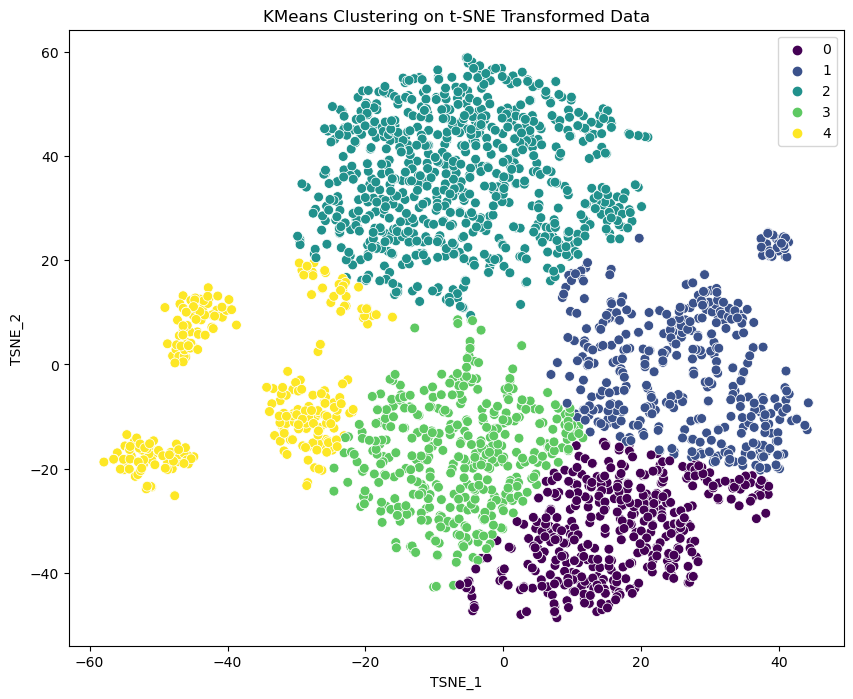

In [36]:

plt.figure(figsize=(10, 8))
sns.scatterplot(x='TSNE_1', y='TSNE_2',hue=clusters, data=X_tsne_transformed_df, palette='viridis', s=50)
plt.title('KMeans Clustering on t-SNE Transformed Data')
plt.show()

In [37]:
print("The Silhouette score of the model is: ",round(silhouette_score(X_tsne_transformed_df, kmeans.fit_predict(X_tsne_transformed_df)),2))
print("The Calinksi-Harabasz score of the model is: ",round(calinski_harabasz_score(X_tsne_transformed_df, kmeans.fit_predict(X_tsne_transformed_df)),2))

C:\Users\amraf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The Silhouette score of the model is:  0.43


C:\Users\amraf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The Calinksi-Harabasz score of the model is:  2736.85


### DBSCAN

In [38]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import euclidean
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from kneed import KneeLocator
import matplotlib.pyplot as plt
import seaborn as sns
import colorcet as cc
import time
import pickle
from dbcv import *

In [39]:
dbscan = DBSCAN(eps=0.5, min_samples=4) # Epsilon=distance, MinPoints=min_samples
values = dbscan.fit_predict(X_tsne_transformed_df)

In [40]:
X_tsne_transformed_df1 = X_tsne_transformed_df.copy()
X_tsne_transformed_df1

,TSNE_1,TSNE_2
0,12.057183,30.787363
1,-10.278848,-15.751392
2,31.176271,-17.586489
3,1.761075,48.901566
4,-25.752190,-14.395313
...,...,...
2388,-19.627802,20.720440
2389,6.180340,52.441338
2390,14.964701,9.427775
2391,-51.648697,-23.390873


In [41]:
X_tsne_transformed_df1['dbscan_clusters'] = values
X_tsne_transformed_df1


,TSNE_1,TSNE_2,dbscan_clusters
0,12.057183,30.787363,-1
1,-10.278848,-15.751392,-1
2,31.176271,-17.586489,-1
3,1.761075,48.901566,-1
4,-25.752190,-14.395313,-1
...,...,...,...
2388,-19.627802,20.720440,-1
2389,6.180340,52.441338,-1
2390,14.964701,9.427775,-1
2391,-51.648697,-23.390873,0


In [42]:
X_tsne_transformed_df1['dbscan_clusters'].value_counts().sort_index()

-1    2373
 0       4
 1       4
 2       4
 3       4
 4       4
Name: dbscan_clusters, dtype: int64

In [43]:
dbscan_clusters = np.unique(values)
dbscan_clusters

array([-1,  0,  1,  2,  3,  4], dtype=int64)

In [44]:
[dbscan_cluster for dbscan_cluster in list(dbscan_clusters) if cluster != -1]

[-1, 0, 1, 2, 3, 4]

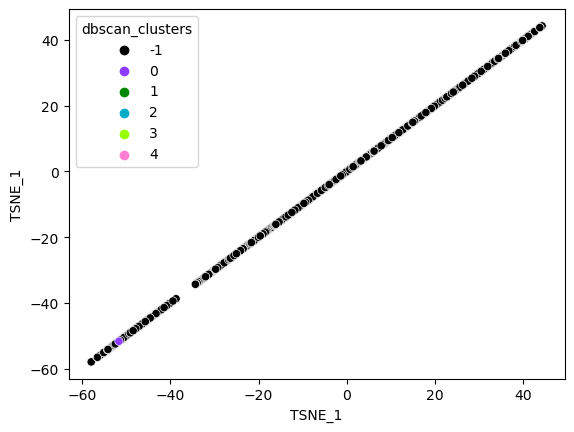

In [45]:
X_tsne_transformed_df1['dbscan_clusters'] = values
# Creating a pallette of hihg contrast colors with as many color as cluster labels
custom_palette = sns.color_palette(cc.glasbey, n_colors=dbscan_clusters.size)
# Modifiying the palette to set the color "black=(0.,0.,0.)" to the label "-1" #(R,G,B)
custom_palette = [color if cluster != -1 else (0.,0.,0.) for cluster, color in zip(dbscan_clusters,custom_palette)]
sns.scatterplot(X_tsne_transformed_df1, x="TSNE_1", y="TSNE_1", hue="dbscan_clusters", palette=custom_palette);
plt.show()

DBSCAN is not good clustering method for our database

### HDBSCAN

In [46]:
# min_samples = 2 * # columns = 2 * 2 = 4
# For every point get what is the distance between each point and the 4-Nearest-Neigbourh
# Sort these distances in descending order, and plot them
# Look where the curve starts to flatten to get the optimal epsilon

In [47]:
from sklearn.cluster import HDBSCAN

    Metrics of clustering:
    - what is a cluster for you? 
    (DBCV for DBSCAN and HDBSCAN)
    KMeans Silhoette score

In [48]:
X_tsne_transformed_df2 = X_tsne_transformed_df.copy()
X_tsne_transformed_df2

,TSNE_1,TSNE_2
0,12.057183,30.787363
1,-10.278848,-15.751392
2,31.176271,-17.586489
3,1.761075,48.901566
4,-25.752190,-14.395313
...,...,...
2388,-19.627802,20.720440
2389,6.180340,52.441338
2390,14.964701,9.427775
2391,-51.648697,-23.390873


In [49]:
model = HDBSCAN()
values1 = model.fit_predict(X_tsne_transformed_df2)



In [50]:
hdbscan_clusters = np.unique(values1)
hdbscan_clusters

array([-1,  0,  1,  2,  3,  4], dtype=int64)

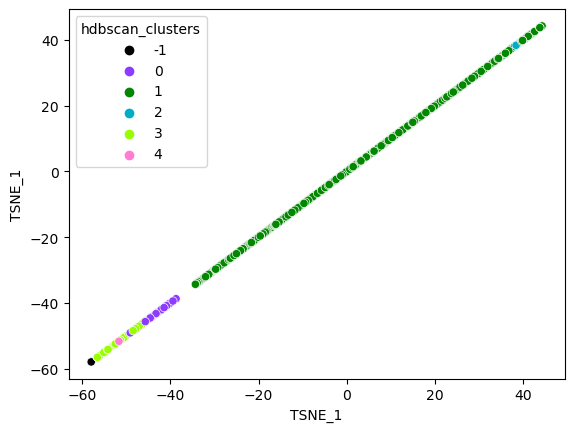

In [51]:
X_tsne_transformed_df2['hdbscan_clusters'] = values1
# Creating a pallette of hihg contrast colors with as many color as cluster labels
custom_palette = sns.color_palette(cc.glasbey, n_colors=hdbscan_clusters.size)
# Modifiying the palette to set the color "black=(0.,0.,0.)" to the label "-1" #(R,G,B)
custom_palette = [color if cluster != -1 else (0.,0.,0.) for cluster, color in zip(hdbscan_clusters,custom_palette)]
sns.scatterplot(X_tsne_transformed_df2, x="TSNE_1", y="TSNE_1", hue="hdbscan_clusters", palette=custom_palette);
plt.show()